In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15,6)

In [2]:
dataset = pd.read_csv('Kmeans_coordinates.csv')
dataset = dataset.iloc[:,1:]
dataset.head()

,0,1
0,4.750000,0.446975
1,1.000000,0.690800
2,5.000000,0.285950
3,4.666667,0.146800
4,5.000000,0.862500


In [3]:
X = dataset.iloc[:,:].values
X

array([[4.75      , 0.446975  ],
       [1.        , 0.6908    ],
       [5.        , 0.28595   ],
       ...,
       [5.        , 0.7184    ],
       [4.57692308, 0.37670769],
       [4.        , 0.8126    ]])

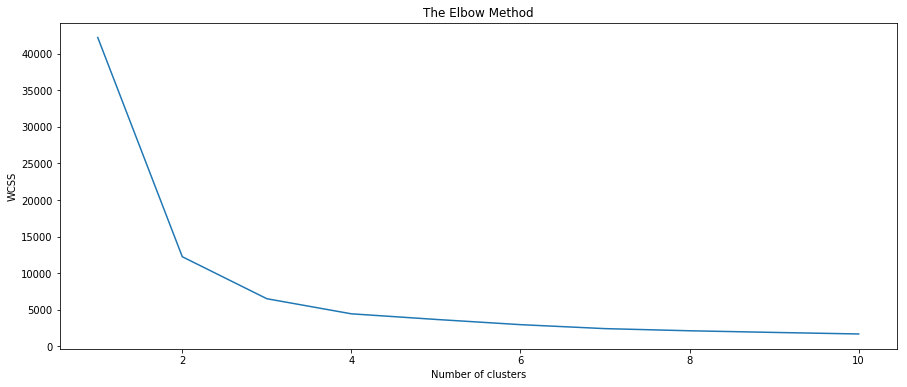

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

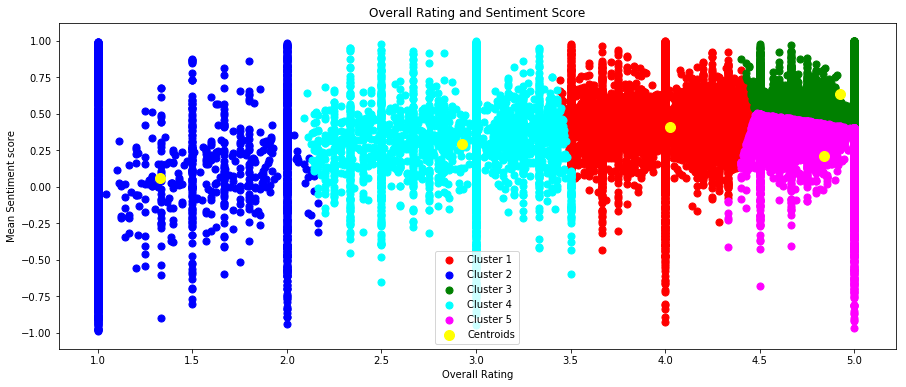

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Overall Rating and Sentiment Score')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Sentiment score')
plt.legend()
plt.show()